**Question 1:**<br>


**1.1)**<br>
using second order taylor approximation:<br>
$f(x)=f(x^*)+\frac{1}{2}(x-x^*)H_{f}(x^*)(x-x^*)$, where $x^*$ is critical point<br>
using the update rule near $x^*$:
<br>$x_{k+1}=x_k-\alpha H_f(x^*)(x_k-x^*)$<br>
$x_{k+1}-x^*=(I-\alpha H_f(x^*))(x_k-x^*)$<br>
We can infer from the update equation that the eigen values of $(I-\alpha H_f(x^*))$ must lie within the unit circle in complex plane so that the perturbations around $x^*$ diminish  rather than grow<br> Therefore,<br>
$-1<1-\alpha\lambda_i<1$ <br>
$0<\alpha<\frac{2}{\lambda_{max}}$<br>
the range of stable learning rate is (0,$\frac{2}{\lambda_{max}}$)<br>
and the critical learning rate is $\frac{2}{\lambda_{max}}$, where $\lambda_{max}$ is the largest eigen value of the Hessian matrix H

**1.2)**<br>
given, <br>$f(x)=\frac{1}{2}x^Tax+bx+c$<br>
using update rule,<br>
$x_{n+1}=x_{n}-\alpha\nabla_{x_n}f(x)$<br>
substituting $\nabla f(x)=ax+b$ is update gives,<br>
$x_{n+1}=x_{n}-\alpha ax_n-\alpha b$<br>
$x_{n+1}=x_n(1-\alpha a)-\alpha b$<br>
we can neglect the constant vector here,<br>
from derivation above replacing Hessian with $a$ we get a similar result,<br>
$0<\alpha<\frac{2}{\lambda_{max}}$<br>
the range of stable learning rate is (0,$\frac{2}{\lambda_{max}}$)<br>
and the critical learning rate is $\frac{2}{\lambda_{max}}$, where $\lambda_{max}$ is the largest eigen value of the matrix $a$

**1.3)**

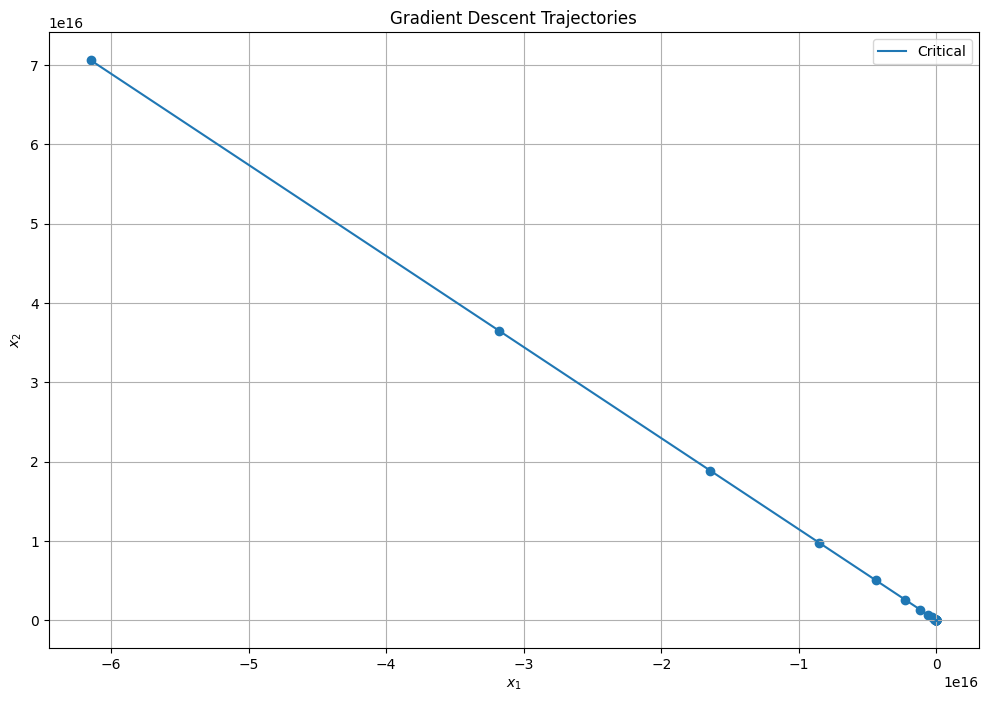

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its gradient
def f(x1, x2):
    return 9*x1**2 + 4*x2**2 + 36*x1*x2 + 9*x1 + 4*x2 + 10

def grad_f(x1, x2):
    dfdx1 = 18*x1 + 36*x2 + 9
    dfdx2 = 8*x2 + 36*x1 + 4
    return np.array([dfdx1, dfdx2])

# Gradient Descent
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    points = [x]
    for i in range(num_iterations):
        grad = grad_f(x[0], x[1])
        x = x - learning_rate * grad
        points.append(x)
    return np.array(points)

# Parameters
starting_point = np.array([5.0, 5.0])
num_iterations = 60

# Learning rates
critical = 0.04  # Adjust this value based on eigenvalue calculation if necessary
zero = 0.00001
outside = 3.0

# Perform gradient descent for each learning rate
crit_gd = gradient_descent(starting_point, critical, num_iterations)
zero_gd = gradient_descent(starting_point, zero, num_iterations)
max_gd = gradient_descent(starting_point, outside, num_iterations)

# Plotting the results
plt.figure(figsize=(12, 8))

if len(crit_gd) > 0:
    plt.plot(crit_gd[:, 0], crit_gd[:, 1], label='Critical')
    plt.scatter(crit_gd[:, 0], crit_gd[:, 1])

# Adjust the axis limits
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Descent Trajectories')
plt.legend()
plt.grid()
plt.show()



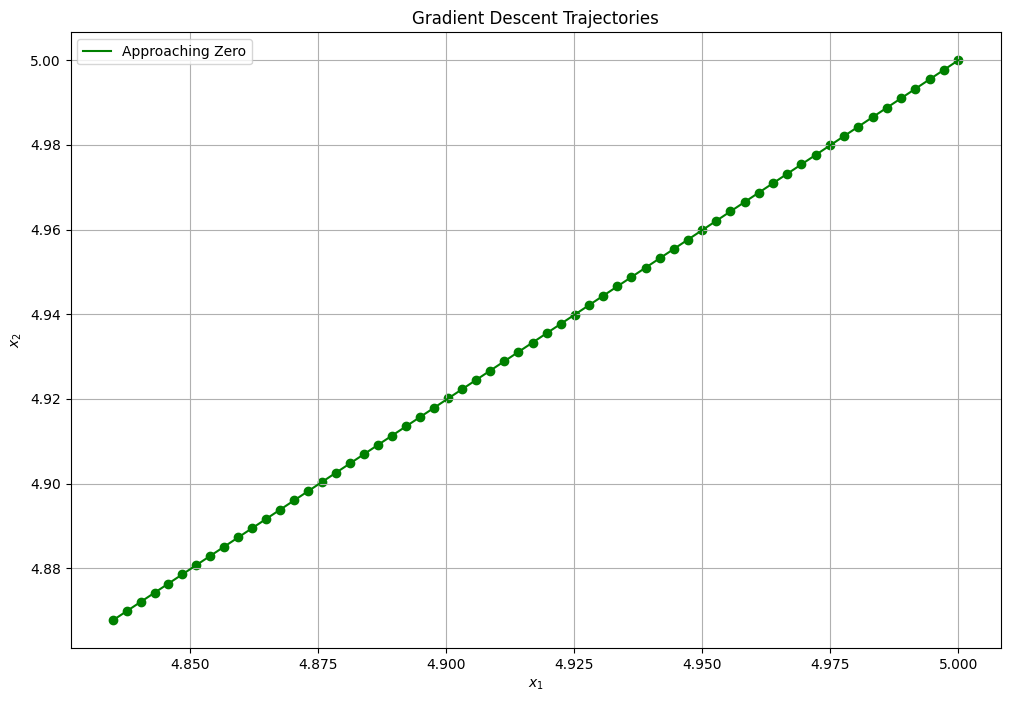

In [41]:
plt.figure(figsize=(12, 8))
if len(zero_gd) > 0:
    plt.plot(zero_gd[:, 0], zero_gd[:, 1], label='Approaching Zero',color='green')
    plt.scatter(zero_gd[:, 0], zero_gd[:, 1],color='green')
    
# Adjust the axis limits
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Descent Trajectories')
plt.legend()
plt.grid()
plt.show()

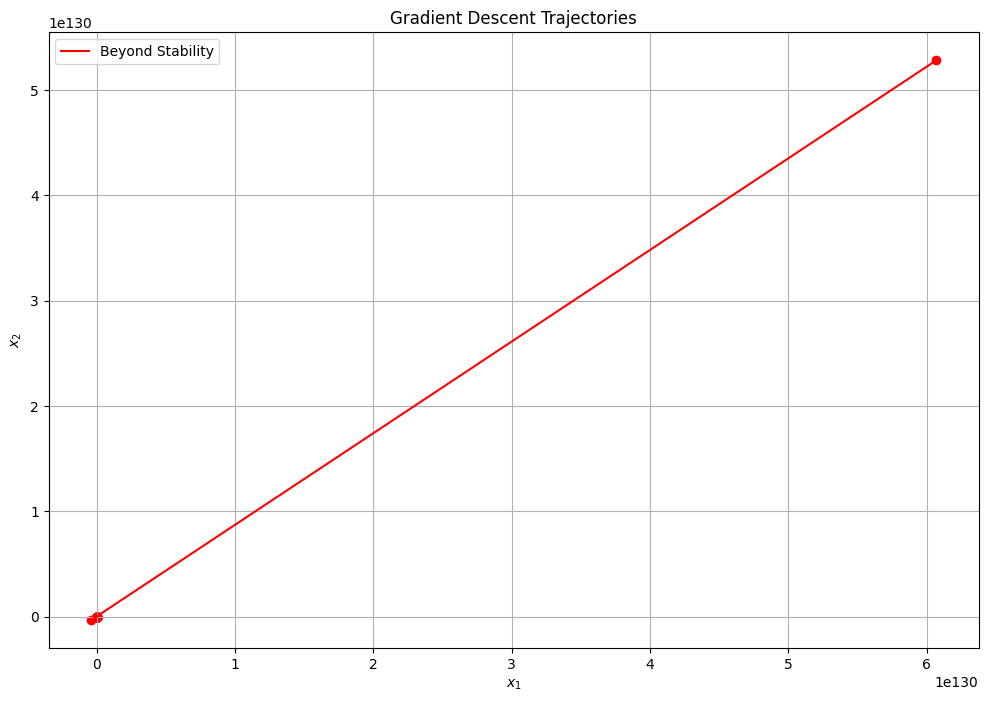

In [44]:
plt.figure(figsize=(12, 8))
if len(max_gd) > 0:
    plt.plot(max_gd[:, 0], max_gd[:, 1], label='Beyond Stability',color='red')
    plt.scatter(max_gd[:, 0], max_gd[:, 1],color='red')

# Adjust the axis limits
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Descent Trajectories')
plt.legend()
plt.grid()
plt.show()

**Question 2:**<br>
the primal problem is:<br>
maximise $50x_1+60x_2$<br>
subject to<br> 
$2x_{1}+x_{2}+x_{3}=300$<br> 
$3x_1 + 4x_2 + x_4 = 509$<br>
$4x_1 + 7x_2 + x_5 = 812$<br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_3 \geq 0$<br>
$x_4 \geq 0$<br> 
$x_5 \geq 0$<br>
the lagrangian fuction is:
$L(x_1,x_2,x_3,x_4,x_5,\lambda_1,\lambda_2,\lambda_3)$=
$50x_1+60x_2+\lambda_1(300-2x_1 - x_2 - x_3)+\lambda_2(-3x_1 - 4x_2 - x_4 + 509)+\lambda_3(812-4x_1 - 7x_2 - x_5)$<br>
expanding and simplyfying:<br>
$L=(50-2\lambda_1-3\lambda_2-4\lambda_3)x_1+(60-\lambda_1-4\lambda_2-7\lambda_3)x_2-\lambda_1x_3-\lambda_2x_4-\lambda_3x_5+300$<br>

**Dual function:**<br>
for $x_1$:<br>
$50-2\lambda_1-3\lambda_2-4\lambda_3\leq0$<br>
for $x_2$:<br>
$60-\lambda_1-4\lambda_2-7\lambda_3\leq0$<br>
for $x_3,x_4,x_5$:<br>
$\lambda_1\geq0\lambda_2\geq0,\lambda_3\geq0$<br>
therefore,<br>
the lagrangian dual for the problem is:<br>
Minimize $300\lambda_1+509\lambda_2+812\lambda_3$<br>
subject to:<br>
$50-2\lambda_1-3\lambda_2-4\lambda_3\leq0$<br>
$60-\lambda_1-4\lambda_2-7\lambda_3\leq0$<br>
$\lambda_1\geq0,\lambda_2\geq0,\lambda_3\geq0$<br>
<br>
Now to apply simplex algorithm let us first convert the problem into standard form,<br>
Maximise $-300\lambda_1-509\lambda_2-812\lambda_3$<br>
subject to:<br>
$50-2\lambda_1-3\lambda_2-4\lambda_3\leq0$<br>
$60-\lambda_1-4\lambda_2-7\lambda_3\leq0$<br>
$\lambda_1\geq0,\lambda_2\geq0,\lambda_3\geq0$<br>
<br>
Now converting into slack form,<br>
Z = $-300\lambda_1-509\lambda_2-812\lambda_3$<br>
$c_1=-50+2\lambda_1+3\lambda_2+4\lambda_3$<br>
$c_2=-60+\lambda_1+4\lambda_2+7\lambda_3$<br>
$\lambda_1\geq0,\lambda_2\geq0,\lambda_3\geq0$<br>
<br>
Taking basic variables as $\lambda_3,c_1,c_2$<br>
we get a basic feasible solution as (4,14,0,0,0)
<br><br>
Simplex Tableau:mbda_2\geq0,\lambda_3\geq0$<br>mbda_2\geq0,\lambda_3\geq0$<br>3\geq0$<br>_2 - x_5)$<br>
x5 ≥0